# Creating SVGs with Python

Python is a great language for creating SVGs. It is a very flexible language that can be used to create SVGs in a variety of ways. In this notebook we will explore some of the ways that Python can be used to create SVGs.


In [2]:
# Importing packages
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import SVG
from graphviz import Digraph
from IPython.display import SVG, display
from graphviz import Digraph
from IPython.display import SVG, display

### Hello world

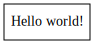

In [3]:
# Hello world for SVGs
f_string = f"Hello {'world'}!"
# Create a new graph
dot = Digraph()
# Add a node for the f string
dot.node('f_string', label=f_string, shape='rectangle')
# Render the graph as an SVG image
dot.format = 'svg'
svg_data = dot.pipe().decode('utf-8')
# Display the SVG image in the notebook
display(SVG(svg_data))

In [4]:
def show_svg(svg_string):
    """Display the SVG image in the notebook."""
    size = (500, 500)
    # Add whitespace and frame to the SVG image
    svg = f'<svg width="100%" height="100%" viewBox="-10 -10 120 120" xmlns="http://www.w3.org/2000/svg" style="background-color: white">'
    svg += f'<rect x="-5" y="-5" width="110" height="110" fill="none" stroke="black" stroke-width="1"/>'
    svg += f'{svg_string}'
    # Close the SVG image
    svg += '</svg>'
    display(SVG(svg))

### Diagonal Line

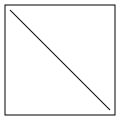

In [7]:
def draw_diagonal(x1, y1, x2, y2, color='black'):
    """Draw a diagonal line from (x1, y1) to (x2, y2)."""
    # Draw the diagonal line
    svg = f'<line x1="{x1}" y1="{y1}" x2="{x2}" y2="{y2}" stroke="{color}" />'
    return svg

show_svg(draw_diagonal(0, 0, 100, 100))

### Draw 100 random diagonals

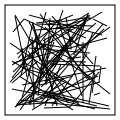

In [9]:
def draw_random_lines(n=100, color='black'):
    """Draw n random diagonals."""
    svg = ''
    for i in range(n):
        # Generate random coordinates
        x1 = random.randint(0, 100)
        y1 = random.randint(0, 100)
        x2 = random.randint(0, 100)
        y2 = random.randint(0, 100)
        # Draw the diagonal line
        svg += draw_diagonal(x1, y1, x2, y2, color)
    return svg

show_svg(draw_random_lines())

### Draw a maze of diagonals

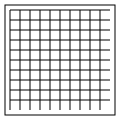

In [10]:
def draw_maze(n=10, color='black'):
    """Draw a maze of diagonals."""
    svg = ''
    for i in range(n):
        # Draw a vertical line
        svg += draw_diagonal(i * 10, 0, i * 10, 100, color)
        # Draw a horizontal line
        svg += draw_diagonal(0, i * 10, 100, i * 10, color)
    return svg

show_svg(draw_maze())

# Rectangle in yellow

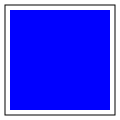

In [11]:
def draw_rectangle(x, y, width, height, color='black'):
    """Draw a rectangle with the given coordinates and dimensions."""
    # Draw the rectangle
    svg = f'<rect x="{x}" y="{y}" width="{width}" height="{height}" fill="{color}" />'
    return svg

show_svg(draw_rectangle(0, 0, 100, 100, 'blue'))

# Circle


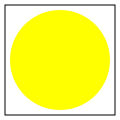

In [12]:
def draw_circle(x, y, radius, color='black'):
    """Draw a circle with the given coordinates and radius."""
    # Draw the circle
    svg = f'<circle cx="{x}" cy="{y}" r="{radius}" fill="{color}" />'
    return svg

show_svg(draw_circle(50, 50, 50, 'yellow'))


# Draw Splashes


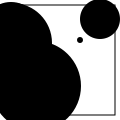

In [19]:
def draw_circles(n=10, color='black'):
    """Draw n circles with different radii."""
    svg = ''
    for i in range(n):
        # Generate random coordinates
        x = random.randint(0, 100)
        y = random.randint(0, 100)
        # Generate a random radius
        radius = random.randint(0, 50)
        # Draw the circle
        svg += draw_circle(x, y, radius, color)
    return svg

show_svg(draw_circles())

# Animation test

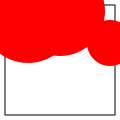

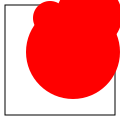

In [25]:
for i in range(2):
    show_svg(draw_circles(3, 'red'))
    # Erase the SVG image

# Draw a ring


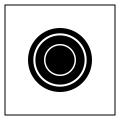

In [26]:
def draw_rings(n=2, color='black'):
    """Draw n rings with different radii."""
    svg = ''
    for i in range(n):
        # Generate random coordinates
        x = 50   # x = random.randint(0, 100)
        y = 50   # y = random.randint(0, 100)
        # Generate a random radius
        radius = random.randint(0, 50)
        # Draw the circle
        svg += draw_circle(x, y, radius, color)
        # Draw the circle
        svg += draw_circle(x, y, radius / 1.2, 'white')
        # Draw the circle
        svg += draw_circle(x, y, radius / 1.3, color)
        # Draw the circle
        svg += draw_circle(x, y, radius / 2, 'white')
        # Draw the circle
        svg += draw_circle(x, y, radius / 2.2, color)
    return svg

show_svg(draw_rings())

# Arcs


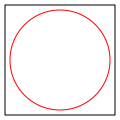

In [33]:
# Draw an arc
def draw_arc(x, y, radius, start_angle, end_angle, color='black'):
    """Draw an arc with the given coordinates and radius."""
    # Draw the arc
    svg = f'<path d="M {x} {y} m 0 -{radius} a {radius} {radius} 0 1 1 0 {radius * 2} a {radius} {radius} 0 1 1 0 -{radius * 2}" fill="none" stroke="{color}" stroke-width="1" transform="rotate({start_angle} {x} {y})" />'
    return svg

show_svg(draw_arc(50, 50, 50, 0, 90, 'red'))



## Patterns

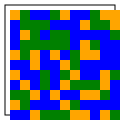

In [38]:
# Create apattenr of 20*20 squares in a random color from a typical color palette
def draw_pattern(n=20, color='black'):
    """Draw a pattern of n squares."""
    svg = ''
    for i in range(n):
        for j in range(n):
            # Generate random coordinates
            x = i * 10
            y = j * 10
            # Generate a random color
            color = random.choice([ 'green', 'blue', 'orange'])
            # Draw the square
            svg += draw_rectangle(x, y, 10, 10, color)
    return svg

show_svg(draw_pattern())

In [31]:
# Twist some of the inner dots, so that tthe pattern gets uneven
def draw_pattern(n=20, color='black'):
    """Draw a pattern of n squares."""
    svg = ''
    for i in range(n):
        for j in range(n):
            # Generate random coordinates
            x = i * 10
            y = j * 10
            # Generate a random color
            color = random.choice([ 'green', 'blue', 'orange'])
            # Draw the square
            svg += draw_rectangle(x, y, 10, 10, color)
            # Draw the square
            if i % 2 == 0 and j % 2 == 0:
                svg += draw_rectangle(x, y, 10, 10, 'white')
    return svg
